In [4]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("./input"))


['test1', 'test1.zip', 'train', 'train.zip']


In [5]:
physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB

In [7]:
filenames = os.listdir("./input/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

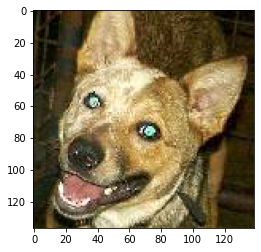

In [8]:
sample = random.choice(filenames)
image = load_img("./input/train/train/"+sample)
plt.imshow(image)

In [9]:
param1 = {
    'loss' : 'categorical_crossentropy',
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.70,0.15,0.10),
    'epoch' : 25
}

param2 = {
    'loss' : 'categorical_crossentropy',
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.70,0.15,0.10),
    'epoch' : 25
} # Pas de différence mais on ajoute un layer sur le model

param3 = {
    'loss' : 'categorical_crossentropy',
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.70,0.15,0.10),
    'epoch' : 50 # on teste avec plus d'époques
}


param4 = {
    'loss' : 'binary_crossentropy', # on change la fonction de loss
    'optimizer' : 'rmsprop',
    'lr' : 0.001,
    'activation' : 'relu',
    'ratioTTV' : (0.70,0.15,0.10),
    'epoch' : 50
}

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import regularizers

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation=param1['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation=param1['activation']))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation=param1['activation']))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation=param1['activation']))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model1.compile(loss=param1['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param1['lr'],
    name="RMSprop"
), metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)      

In [75]:

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation=param2['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#On ajoute un layer
model2.add(Conv2D(256, (3, 3), activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation=param2['activation']))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model2.compile(loss=param2['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param2['lr'],
    name="RMSprop"
)
, metrics=['accuracy'])

model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_57 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_58 (Bat  (None, 61, 61, 64)     

In [81]:

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation=param3['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(256, (3, 3), activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512, activation=param3['activation']))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model3.compile(loss=param3['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param3['lr'],
    name="RMSprop"
)
, metrics=['accuracy'])

model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_67 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_67 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_68 (Bat  (None, 61, 61, 64)     

In [11]:

model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation=param4['activation'], input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, (3, 3), activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(256, (3, 3), activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512, activation=param4['activation']))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model4.compile(loss=param4['loss'], optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=param4['lr'],
    name="RMSprop"
)
, metrics=['accuracy'])

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
earlystop = EarlyStopping(patience=10)

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.001)

In [15]:
callbacks = [earlystop, learning_rate_reduction]

In [16]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
print(df)

           filename category
0         cat.0.jpg      cat
1         cat.1.jpg      cat
2        cat.10.jpg      cat
3       cat.100.jpg      cat
4      cat.1000.jpg      cat
...             ...      ...
24995  dog.9995.jpg      dog
24996  dog.9996.jpg      dog
24997  dog.9997.jpg      dog
24998  dog.9998.jpg      dog
24999  dog.9999.jpg      dog

[25000 rows x 2 columns]


In [17]:
train_ratio = param1['ratioTTV'][0]
validation_ratio = param1['ratioTTV'][1]
test_ratio = 2
train_df, test_df = train_test_split(df, test_size=1 - train_ratio, random_state=42)
validation_df, test_df = train_test_split(test_df, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
validate_df = validation_df.reset_index(drop=True)
print(train_df)
print(test_df)
print(validation_df)

            filename category
0       cat.7152.jpg      cat
1       dog.9289.jpg      dog
2        dog.441.jpg      dog
3       dog.1958.jpg      dog
4      cat.10041.jpg      cat
...              ...      ...
17494   dog.6916.jpg      dog
17495     cat.36.jpg      cat
17496  cat.10771.jpg      cat
17497   dog.1713.jpg      dog
17498   dog.8788.jpg      dog

[17499 rows x 2 columns]
           filename category
0       dog.568.jpg      dog
1      cat.4512.jpg      cat
2      cat.8237.jpg      cat
3      dog.7742.jpg      dog
4      dog.3320.jpg      dog
...             ...      ...
6973  dog.12461.jpg      dog
6974   cat.9213.jpg      cat
6975   cat.9579.jpg      cat
6976   dog.6890.jpg      dog
6977  dog.11363.jpg      dog

[6978 rows x 2 columns]
            filename category
16315   dog.2181.jpg      dog
8628    cat.6513.jpg      cat
1944   cat.11747.jpg      cat
24527   dog.9573.jpg      dog
23021   dog.8217.jpg      dog
...              ...      ...
4678    cat.2959.jpg      cat
2

<AxesSubplot:>

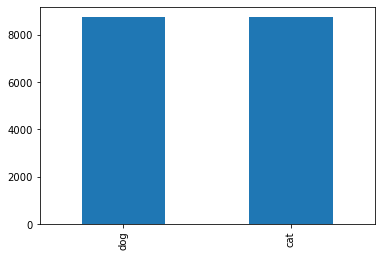

In [18]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

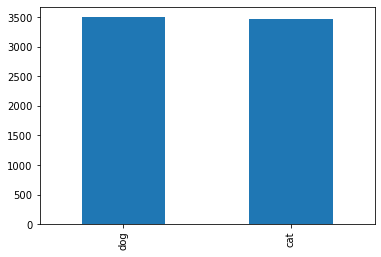

In [19]:
test_df['category'].value_counts().plot.bar()

<AxesSubplot:>

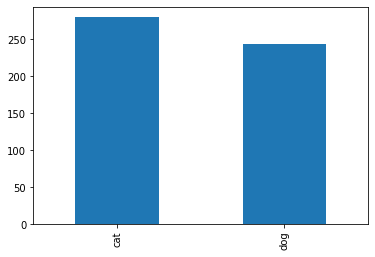

In [20]:
validate_df['category'].value_counts().plot.bar()

In [21]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=20

In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 17499 validated image filenames belonging to 2 classes.


In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 523 validated image filenames belonging to 2 classes.


In [66]:
history = model1.fit(
    train_generator, 
    epochs=param1['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
874/874 [==============================] - 183s 206ms/step - loss: 0.7659 - accuracy: 0.6396 - val_loss: 0.6004 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 2/25
874/874 [==============================] - 125s 143ms/step - loss: 0.5557 - accuracy: 0.7213 - val_loss: 0.6817 - val_accuracy: 0.6442 - lr: 0.0010
Epoch 3/25
874/874 [==============================] - 127s 145ms/step - loss: 0.4979 - accuracy: 0.7634 - val_loss: 0.7523 - val_accuracy: 0.6981 - lr: 0.0010
Epoch 4/25
874/874 [==============================] - 141s 162ms/step - loss: 0.4692 - accuracy: 0.7807 - val_loss: 0.4107 - val_accuracy: 0.8096 - lr: 0.0010
Epoch 5/25
874/874 [==============================] - 125s 143ms/step - loss: 0.4426 - accuracy: 0.7968 - val_loss: 0.4124 - val_accuracy: 0.8192 - lr: 0.0010
Epoch 6/25
874/874 [==============================] - 191s 218ms/step - loss: 0.4137 - accuracy: 0.8137 - val_loss: 0.4733 - val_accuracy: 0.7635 - lr: 0.0010
Epoch 7/25
874/874 [==========================

In [76]:


history2 = model2.fit(
    train_generator, 
    epochs=param2['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
874/874 [==============================] - 140s 155ms/step - loss: 0.7693 - accuracy: 0.6334 - val_loss: 0.5833 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 2/25
874/874 [==============================] - 195s 223ms/step - loss: 0.5382 - accuracy: 0.7327 - val_loss: 0.5692 - val_accuracy: 0.7365 - lr: 0.0010
Epoch 3/25
874/874 [==============================] - 174s 199ms/step - loss: 0.4757 - accuracy: 0.7746 - val_loss: 0.5191 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 4/25
874/874 [==============================] - 149s 170ms/step - loss: 0.4298 - accuracy: 0.8041 - val_loss: 0.4973 - val_accuracy: 0.7577 - lr: 0.0010
Epoch 5/25
874/874 [==============================] - 136s 155ms/step - loss: 0.4003 - accuracy: 0.8219 - val_loss: 0.3401 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 6/25
874/874 [==============================] - 125s 143ms/step - loss: 0.3706 - accuracy: 0.8381 - val_loss: 0.3470 - val_accuracy: 0.8519 - lr: 0.0010
Epoch 7/25
874/874 [==========================

In [82]:
history3 = model3.fit(
    train_generator, 
    epochs=param3['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
874/874 [==============================] - 120s 134ms/step - loss: 0.7754 - accuracy: 0.6219 - val_loss: 0.6042 - val_accuracy: 0.6827 - lr: 0.0010
Epoch 2/50
874/874 [==============================] - 121s 138ms/step - loss: 0.5472 - accuracy: 0.7282 - val_loss: 0.5109 - val_accuracy: 0.7308 - lr: 0.0010
Epoch 3/50
874/874 [==============================] - 116s 133ms/step - loss: 0.4840 - accuracy: 0.7708 - val_loss: 0.4235 - val_accuracy: 0.8096 - lr: 0.0010
Epoch 4/50
874/874 [==============================] - 118s 134ms/step - loss: 0.4265 - accuracy: 0.8069 - val_loss: 0.3969 - val_accuracy: 0.8404 - lr: 0.0010
Epoch 5/50
874/874 [==============================] - 117s 134ms/step - loss: 0.3980 - accuracy: 0.8237 - val_loss: 0.3291 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 6/50
874/874 [==============================] - 117s 133ms/step - loss: 0.3569 - accuracy: 0.8436 - val_loss: 0.4248 - val_accuracy: 0.8308 - lr: 0.0010
Epoch 7/50
874/874 [==========================

In [26]:
history4 = model4.fit(
    train_generator, 
    epochs=param4['epoch'],
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
874/874 [==============================] - 189s 209ms/step - loss: 0.7129 - accuracy: 0.6435 - val_loss: 0.5674 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 2/50
874/874 [==============================] - 148s 170ms/step - loss: 0.5058 - accuracy: 0.7538 - val_loss: 0.7255 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 3/50
782/874 [=========================>....] - ETA: 22s - loss: 0.4359 - accuracy: 0.8001

KeyboardInterrupt: 

In [35]:
model1.save_weights("model1.h5")

In [70]:
print(history.history)

{'loss': [0.7659029364585876, 0.5557394623756409, 0.49785977602005005, 0.469164103269577, 0.4426071047782898, 0.4136592745780945, 0.39757856726646423, 0.3888149559497833, 0.3682418763637543, 0.3649711608886719, 0.354621946811676, 0.3459831476211548, 0.3396901488304138, 0.337898850440979, 0.328845351934433, 0.3264509439468384, 0.3178848624229431, 0.31631022691726685, 0.3128376305103302, 0.30816686153411865, 0.3053552210330963, 0.30503585934638977, 0.3014035224914551, 0.2976844608783722, 0.28735074400901794], 'accuracy': [0.6396247148513794, 0.7213227152824402, 0.7633731961250305, 0.7806510925292969, 0.7968419194221497, 0.8137193322181702, 0.8233880400657654, 0.8279649615287781, 0.8395217061042786, 0.8410664200782776, 0.8462726473808289, 0.8473597168922424, 0.8543394804000854, 0.8569139838218689, 0.8604038953781128, 0.8596601486206055, 0.8654957413673401, 0.8670976758003235, 0.8669832348823547, 0.8707591891288757, 0.8716173768043518, 0.8726471662521362, 0.8738486170768738, 0.872990429401

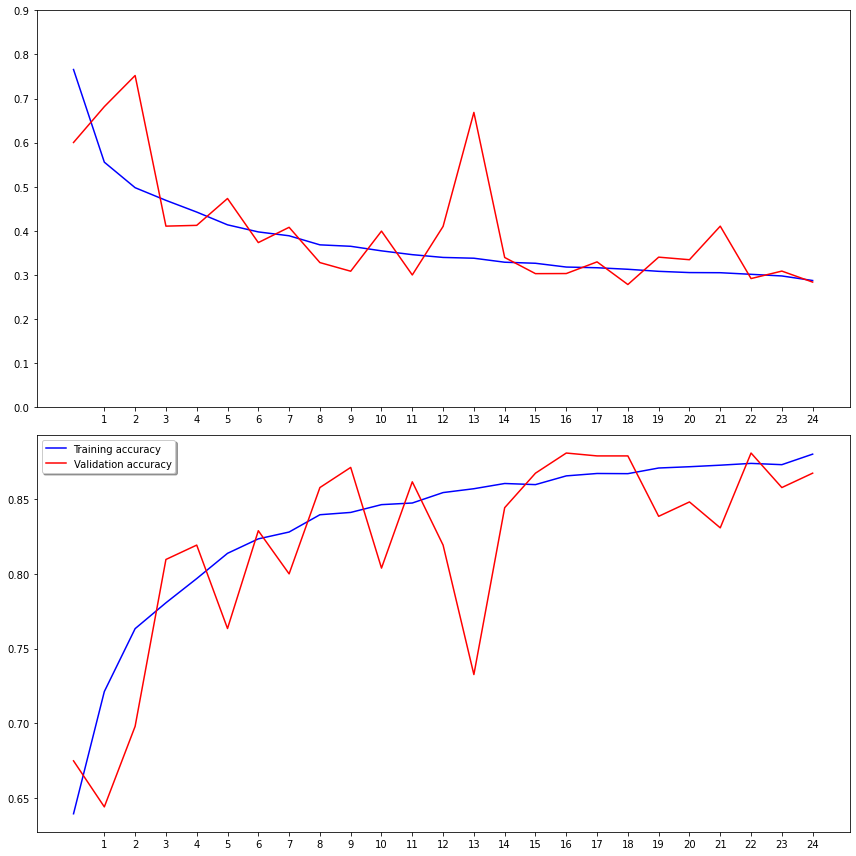

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param1['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param1['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

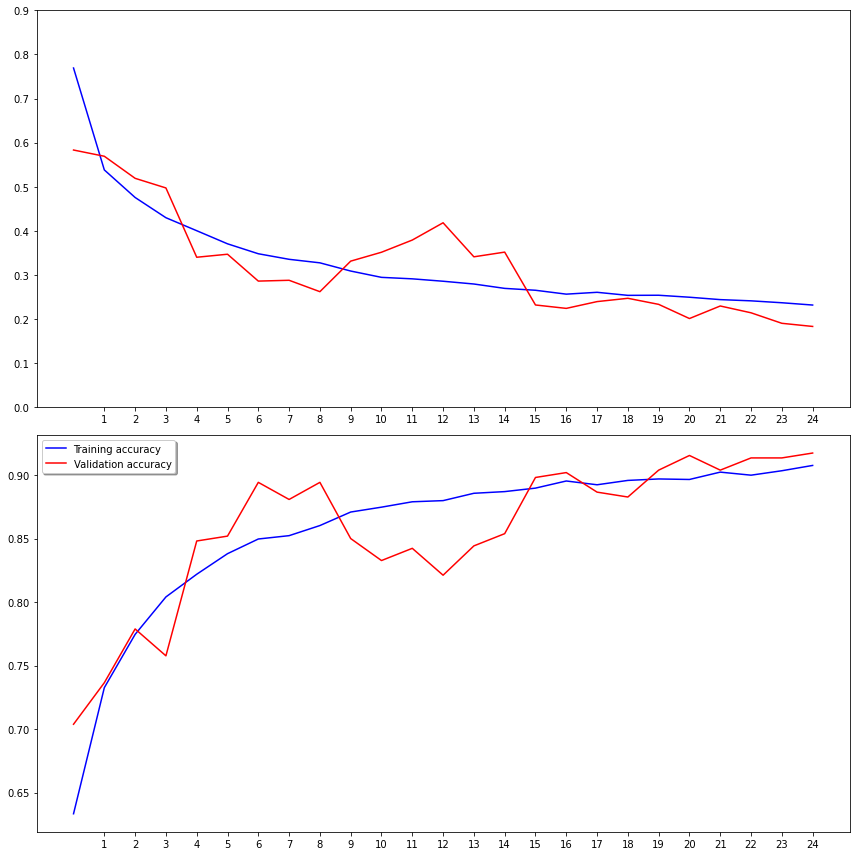

In [77]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history2.history['loss'], color='b', label="Training loss")
ax1.plot(history2.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param2['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history2.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history2.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param2['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

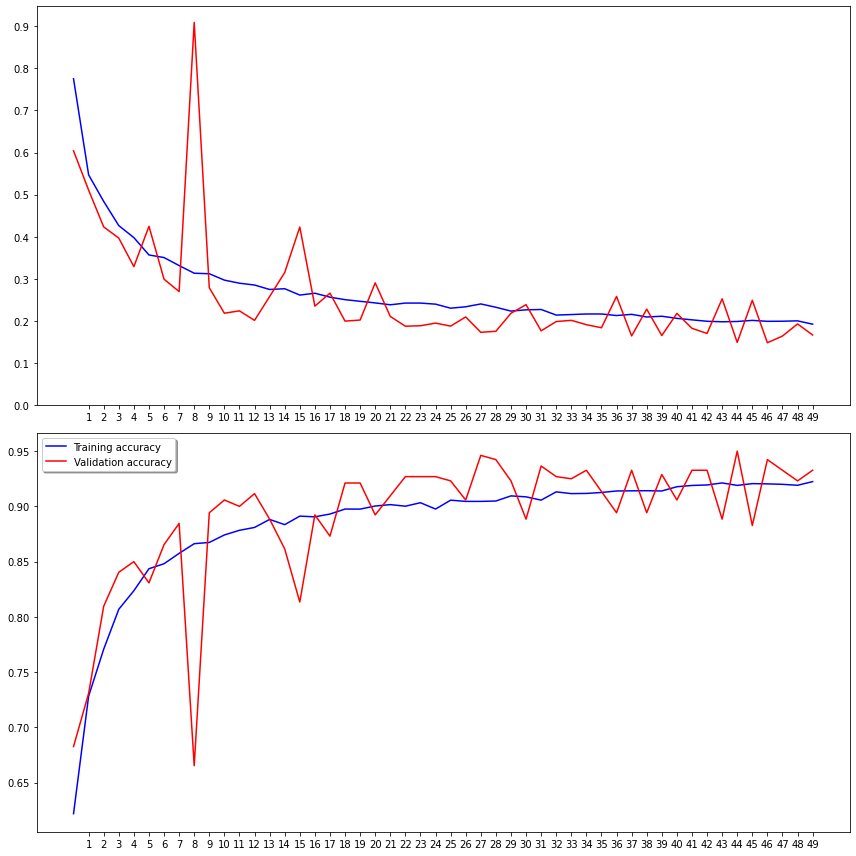

In [83]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history3.history['loss'], color='b', label="Training loss")
ax1.plot(history3.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, param3['epoch'], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history3.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history3.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, param3['epoch'], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [84]:
model3.save_weights("model3.h5")